<a href="https://colab.research.google.com/github/ealima/ealima/blob/main/Aplica%C3%A7%C3%B5es_da_TDF_em_Sinais_Biom%C3%A9dicos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np

In [ ]:
ecg = np.loadtxt('ECG.txt')

In [ ]:
from scipy.fft import fft, fftfreq, ifft
import matplotlib.pyplot as plt
import numpy as np

N = 600
fs = 600
Ts = 1/fs
x = Ts*np.arange(0, len(ecg))



**a) Plotar o sinal no domínio do TEMPO, ou seja, amplitude da amostra  x segundo, mostrando uma janela mínima de 10 segundos de sinal;**

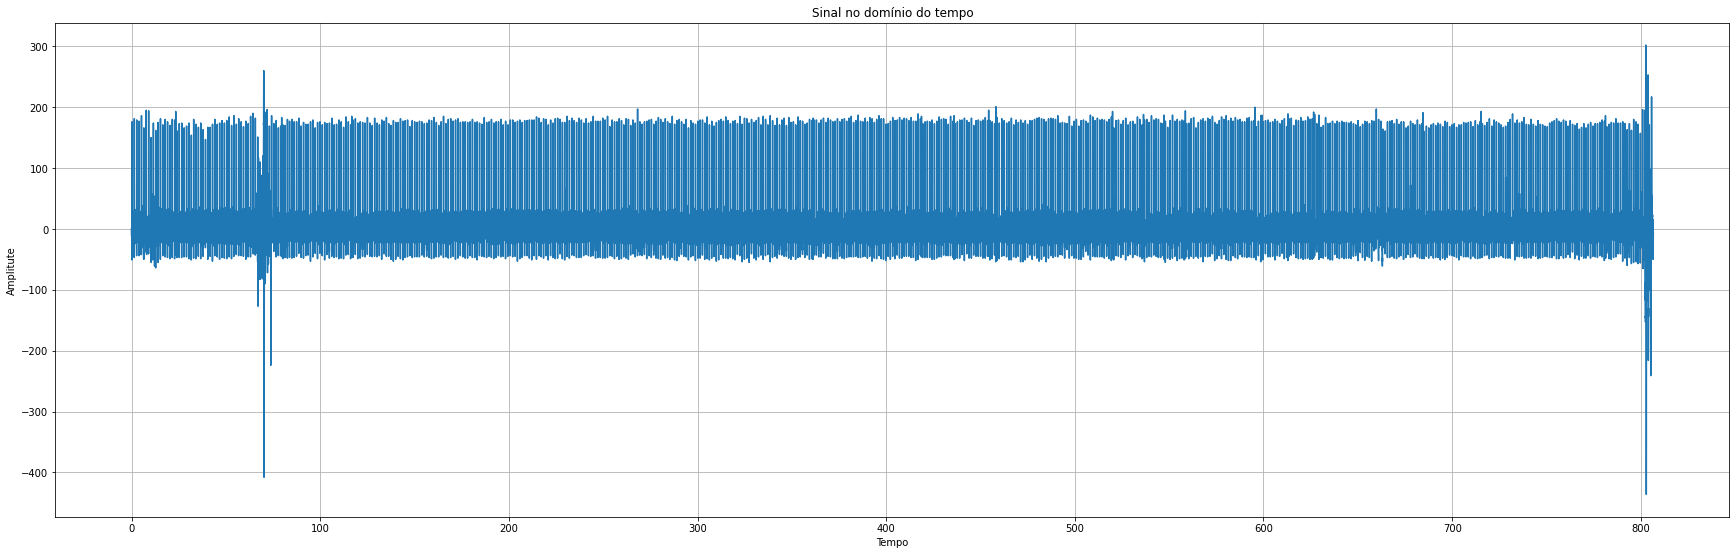

In [ ]:
plt.figure(figsize=(30,20))
plt.subplot(2,1,1)

plt.plot(x, ecg)

plt.title('Sinal no domínio do tempo')
plt.xlabel('Tempo')
plt.ylabel('Amplitute')

plt.grid()

**b) Levantar o espectro de amplitude de Fourier do sinal (com no mínimo 3 valores de N, ou seja, número de pontos diferentes);**


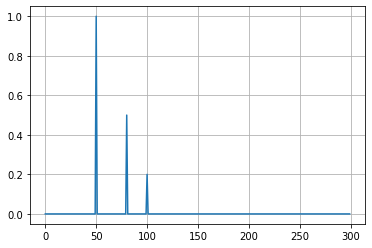

In [ ]:
#Transformada Discreta de Fourier

N = 600
fs = 600 # numero de pontos por segundo, frequencia de amostragem é FIXA! "1000 Hz"
Ts = 1/fs # intervalo de tempo entre duas amostras (taxa de amostragem) # delta_t = tempo entre amostras
x = Ts*np.arange(N)
ruido_freq =  0.2*np.sin(2*np.pi*x*100)
y = np.sin(10.0 * 2.0*np.pi*x) + 0.5*np.sin(30.0 * 2.0*np.pi*x) #tirar
y_ruido = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x) + ruido_freq

yf = fft(y_ruido)
xf = fftfreq(N, Ts)[:N//2]  # irá calcular as frequencias presentes na amostra

import matplotlib.pyplot as plt

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

**c) Levantar a densidade espectral de potência (PSD) com diferentes valores de resolução (escolha 3 valores de N, ou seja, número de pontos diferentes para alterar a resolução); Compare e discuta os resultados;**

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np


rng = np.random.default_rng()

fs = 10e3 # numero de pontos por segundo, frequencia de amostragem é FIXA! "600 Hz"
N = 1e5
amp = np.sqrt(2)
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = 2*amp*np.sin(1000.0 * 2.0*np.pi*time) + 2*amp*np.sin(2000.0 * 2.0*np.pi*time)
y= rng.normal(scale=np.sqrt(noise_power), size=time.shape) + x

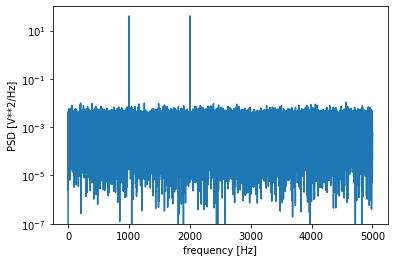

In [ ]:
f, Pxx_den = signal.periodogram(y, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
# PSD: AMPLAMENTE UTILIZADO EM SINAIS ESTOCÁSTICOS DE BANDA LARGA

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np


rng = np.random.default_rng()

fs = 10e3 # numero de pontos por segundo, frequencia de amostragem é FIXA! "1000 Hz"
N = 1e5
amp = np.sqrt(2)
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = 2*amp*np.sin(1000.0 * 2.0*np.pi*time) + 2*amp*np.sin(2000.0 * 2.0*np.pi*time)
y= rng.normal(scale=np.sqrt(noise_power), size=time.shape) + x

f, Pxx_den = signal.periodogram(y, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()